<a href="https://colab.research.google.com/github/Satwikram/HuggingFace/blob/main/The%20Hugging%20Face%20Hub%20-%20Using%20models%20and%20tokenizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

### Setup

In [ ]:
!pip install transformers SentencePiece

### Using pretrained models

The Model Hub makes selecting the appropriate model simple, so that using it in any downstream library can be done in a few lines of code. Let’s take a look at how to actually use one of these models, and how to contribute back to the community.

Let’s say we’re looking for a French-based model that can perform mask filling.

We select the camembert-base checkpoint to try it out. The identifier camembert-base is all we need to start using it! As you’ve seen in previous chapters, we can instantiate it using the pipeline() function:

In [2]:
from transformers import pipeline

camembert_fill_mask = pipeline("fill-mask", model="camembert-base")
results = camembert_fill_mask("Le camembert est <mask> :)")

In [3]:
results

[{'score': 0.49091097712516785,
  'token': 7200,
  'token_str': 'délicieux',
  'sequence': 'Le camembert est délicieux :)'},
 {'score': 0.1055697426199913,
  'token': 2183,
  'token_str': 'excellent',
  'sequence': 'Le camembert est excellent :)'},
 {'score': 0.03453319892287254,
  'token': 26202,
  'token_str': 'succulent',
  'sequence': 'Le camembert est succulent :)'},
 {'score': 0.03303128108382225,
  'token': 528,
  'token_str': 'meilleur',
  'sequence': 'Le camembert est meilleur :)'},
 {'score': 0.030076386407017708,
  'token': 1654,
  'token_str': 'parfait',
  'sequence': 'Le camembert est parfait :)'}]

As you can see, loading a model within a pipeline is extremely simple. The only thing you need to watch out for is that the chosen checkpoint is suitable for the task it’s going to be used for. For example, here we are loading the camembert-base checkpoint in the fill-mask pipeline, which is completely fine. But if we were to load this checkpoint in the text-classification pipeline, the results would not make any sense because the head of camembert-base is not suitable for this task! We recommend using the task selector in the Hugging Face Hub interface in order to select the appropriate checkpoints:

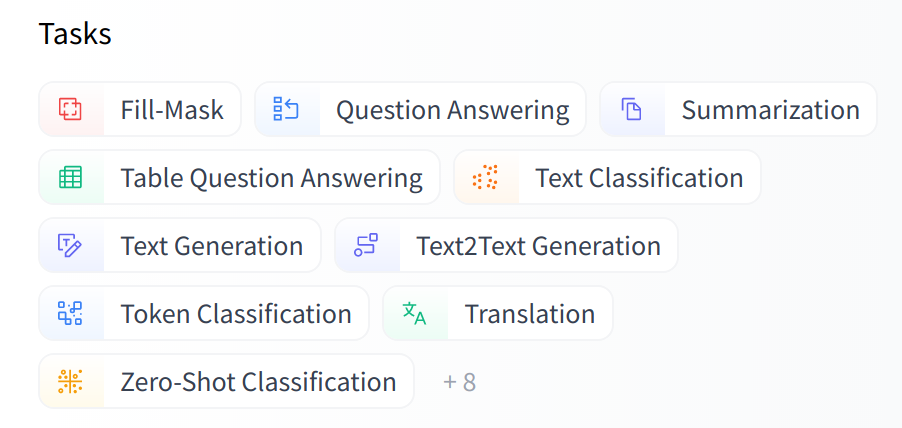

You can also instantiate the checkpoint using the model architecture directly:



In [7]:
from transformers import AutoTokenizer, TFAutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("camembert-base")
model = TFAutoModelForMaskedLM.from_pretrained("camembert-base")

All model checkpoint layers were used when initializing TFCamembertForMaskedLM.

All the layers of TFCamembertForMaskedLM were initialized from the model checkpoint at camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForMaskedLM for predictions without further training.
